<a href="https://colab.research.google.com/github/midounai/auto-mpg-regression/blob/main/auto_mpg_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 忽略警告
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
# 上傳CSV
uploaded = files.upload()

Saving auto-mpg.csv to auto-mpg.csv


In [3]:
#讀取檔案
import io
df = pd.read_csv('auto-mpg.csv') 
df 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [6]:
df["horsepower"] = pd.to_numeric(df["horsepower"], errors = "coerce")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [7]:
df=df.fillna(df.mean())

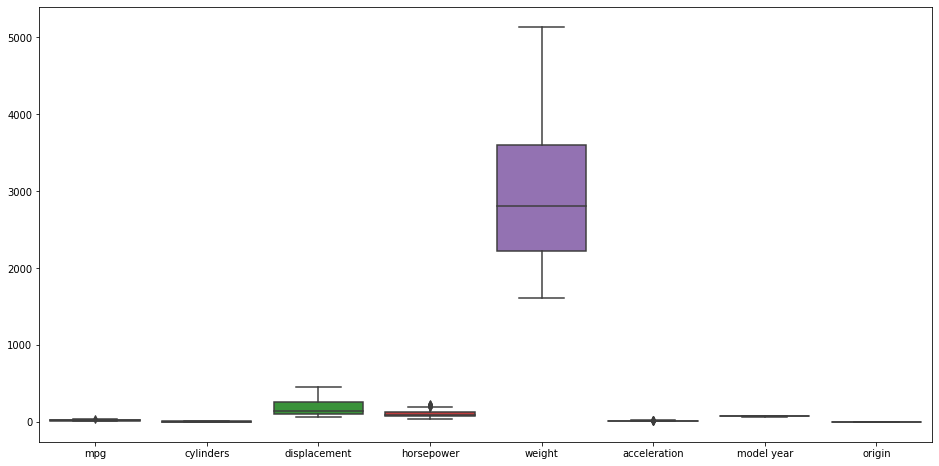

In [8]:
plt.figure(figsize = (16, 8))
sns.boxplot(data = df, width = 0.8)
plt.show()

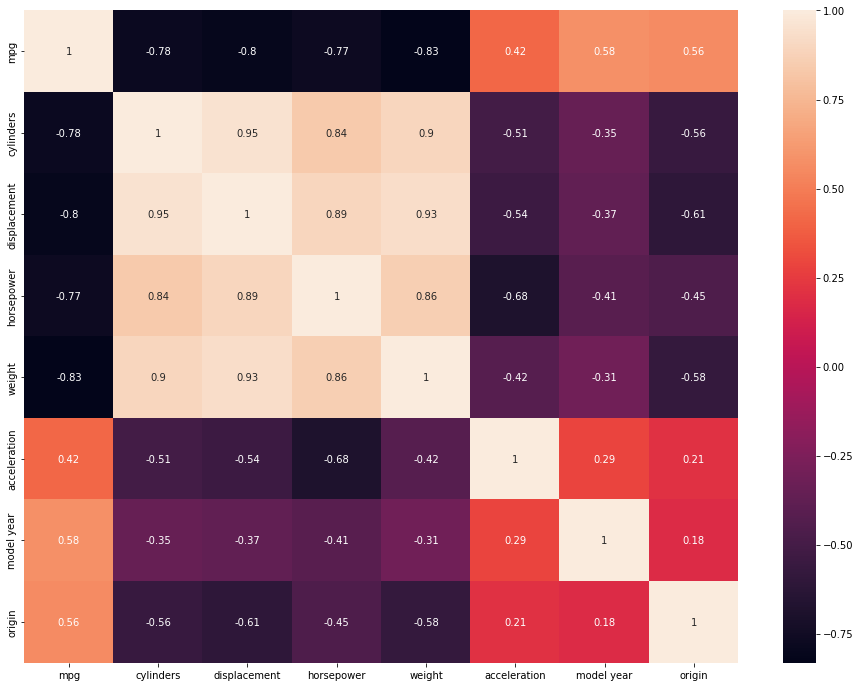

In [9]:
cor=df.corr()
fig, ax = plt.subplots(figsize=(16, 12))

sns.heatmap(cor,annot=True)

In [10]:
columns_X = set(df.columns) - {'car name'} - {'mpg'}
X = df[columns_X]
X.head()

,cylinders,weight,horsepower,model year,origin,displacement,acceleration
0,8,3504,130.0,70,1,307.0,12.0
1,8,3693,165.0,70,1,350.0,11.5
2,8,3436,150.0,70,1,318.0,11.0
3,8,3433,150.0,70,1,304.0,12.0
4,8,3449,140.0,70,1,302.0,10.5


In [11]:
#切分資料
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df['mpg'], test_size = 0.3, random_state=0)

In [12]:
print(X_train.count())
print(X_test.count())

cylinders       278
weight          278
horsepower      278
model year      278
origin          278
displacement    278
acceleration    278
dtype: int64
cylinders       120
weight          120
horsepower      120
model year      120
origin          120
displacement    120
acceleration    120
dtype: int64


In [13]:
print(y_train.count())
print(y_test.count())

278
120


In [14]:
import xgboost as xgb
xgbrModel=xgb.XGBRegressor()
# 使用訓練資料訓練模型
xgbrModel.fit(X_train,y_train)
# 使用訓練資料預測
predicted=xgbrModel.predict(X_train)

[08:55:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [15]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
scores = cross_validate(xgbrModel, X_train, y_train, cv=3,return_train_score=False)
display(scores)


[08:55:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:55:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:55:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


{'fit_time': array([0.02530527, 0.0198195 , 0.01780653]),
 'score_time': array([0.00174069, 0.00175762, 0.00159883]),
 'test_score': array([0.8398213 , 0.87178698, 0.85810546])}

In [16]:
scores = cross_validate(xgbrModel, X_test, y_test, cv=3,return_train_score=False)
display(scores)

[08:55:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:55:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:55:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


{'fit_time': array([0.02107   , 0.01267266, 0.01302528]),
 'score_time': array([0.00159883, 0.0014019 , 0.00145555]),
 'test_score': array([0.80918254, 0.73983467, 0.81112716])}

In [17]:
predicted=xgbrModel.predict(X_test)
df_com=pd.DataFrame(predicted,y_test)

In [18]:
df_com=df_com.reset_index()
df_com

,mpg,0
0,14.0,13.646386
1,25.0,23.769205
2,13.0,14.390692
3,21.0,19.279499
4,18.0,17.871803
...,...,...
115,25.5,24.124220
116,29.9,34.458878
117,13.0,13.016747
118,17.5,15.821824


In [19]:
df_com.rename({'mpg': 'answer', 0: 'pred'}, axis=1, inplace=True)
df_com.head()

,answer,pred
0,14.0,13.646386
1,25.0,23.769205
2,13.0,14.390692
3,21.0,19.279499
4,18.0,17.871803


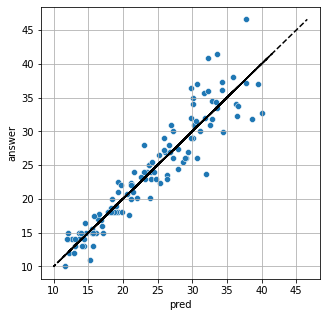

In [20]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.scatterplot( x="pred", y="answer",data=df_com,ax=ax)
plt.plot("answer","answer",'k--',data=df_com)
plt.grid()
plt.show()
